## Ingeniería de variables

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Leer los datos

In [16]:
df = pd.read_parquet('./data/2_data_preprocesada.parquet')
df = df.drop(columns=['DF_TYPE'])

print(df.info(),'\n\n')
print(df['TARGET'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305605 entries, 0 to 1305604
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   FBK_ULT12        1305605 non-null  object 
 1   FBK_BEST12       1305605 non-null  object 
 2   COD_SALA         1305605 non-null  object 
 3   DEPARTAMENTO     1305605 non-null  object 
 4   SEGMENTO         1305605 non-null  object 
 5   RANGO_INGRESOS   1305605 non-null  object 
 6   NUMPRIORIZACION  1305605 non-null  int64  
 7   NC_DISTR12       1305605 non-null  float64
 8   TOTGEST6         1305605 non-null  float64
 9   DIAS_ULT6        1305605 non-null  float64
 10  DIAS_BEST12      1305605 non-null  float64
 11  NC_CTD12         1305605 non-null  float64
 12  NC_DIAS6         1305605 non-null  float64
 13  TARGET           1305605 non-null  int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 139.5+ MB
None 


TARGET
0    0.534595
1    0.465405
Name: propor

### 2. Normalizar datos numéricos

In [23]:
# Divide el dataframe en datos df_categorical y df_numeric
df_categorical = df.select_dtypes(include=['object'])
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric

,NUMPRIORIZACION,NC_DISTR12,TOTGEST6,DIAS_ULT6,DIAS_BEST12,NC_CTD12,NC_DIAS6,TARGET
0,1,0.333333,6.000000,8.000000,8.000000,2.0,58.0,1
1,1,0.461538,13.000000,9.000000,46.000000,6.0,9.0,1
2,1,0.666667,2.000000,127.000000,223.000000,4.0,127.0,1
3,1,0.587062,4.000000,49.000000,49.000000,4.0,38.0,1
4,1,0.187500,10.000000,27.000000,27.000000,3.0,140.0,1
...,...,...,...,...,...,...,...,...
1305600,1,0.587062,7.463895,44.627989,80.041789,4.0,38.0,0
1305601,1,0.587062,7.463895,44.627989,80.041789,4.0,38.0,0
1305602,1,0.587062,7.463895,44.627989,80.041789,4.0,38.0,1
1305603,2,0.587062,7.463895,44.627989,80.041789,4.0,38.0,0


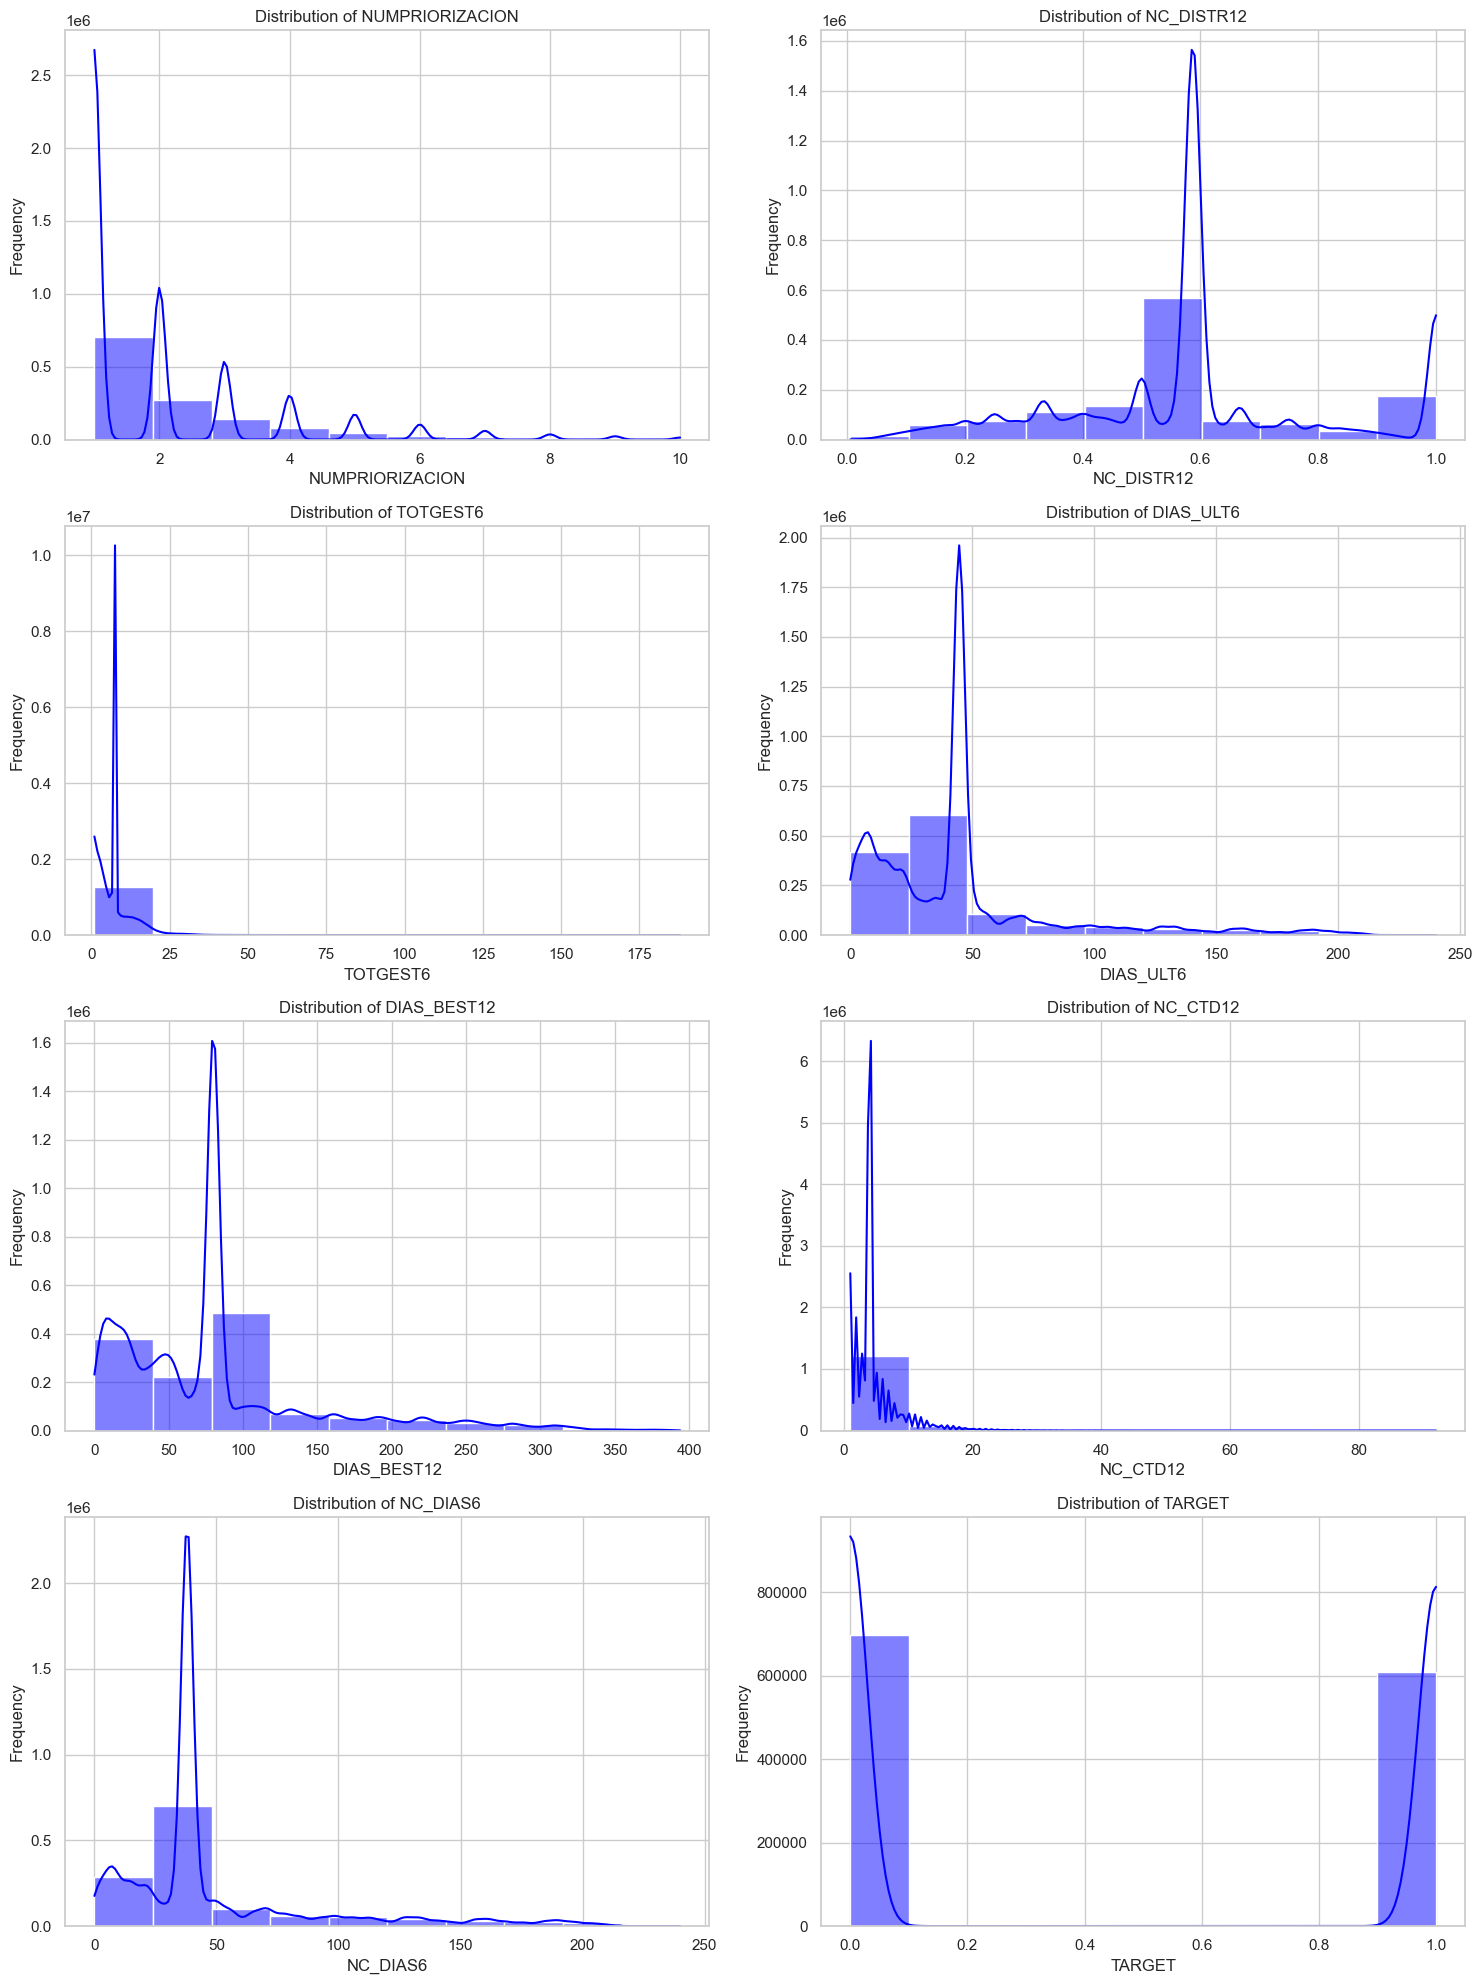

In [25]:
# Plotting the distribution with KDE (Kernel Density Estimation) lines for each column
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, col in enumerate(df_numeric.columns):
    ax = axes[i//2, i%2]
    sns.histplot(df_numeric[col], bins=10, kde=True, ax=ax, color='blue')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()